# Project ProRail 

In [1]:
# libraries importeren 
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dataset inlezen 
df = pd.read_csv('sap_storing_data_hu_project.csv', low_memory=False)

In [3]:
# Alle kolommen die niet van toepassing zijn worden verwijdert.
df = df.drop(['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld', 
         'stm_scenario_mon', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 
         'stm_aanntpl_ddt', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt', 
         'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz', 
         'stm_veroorz_groep', 'stm_veroorz_code', 'stm_veroorz_tekst_kort', 'stm_effect', 'stm_afspr_aanvangddt', 
         'stm_mon_eind_ddt', 'stm_mon_vhdsincident', 'stm_dir_betrok_tr', 'stm_aangelegd_dd', 'stm_aangelegd_tijd',
         'stm_mon_begindatum', 'stm_mon_begintijd', 'stm_progfh_gw_datum', 'stm_mon_eind_datum',
         'stm_mon_eind_tijd', 'stm_controle_dd', 'stm_akkoord_mon_toewijz', 'stm_status_sapnaarmon',
         'stm_fact_jn', 'stm_akkoord_melding_jn', 'stm_afsluit_ddt', 'stm_afsluit_dd', 'stm_afsluit_tijd',
         'stm_rec_toegev_ddt', 'stm_hinderwaarde', 'stm_actie', 'stm_standplaats', 'stm_status_gebr',
         'stm_wbi_nummer', 'stm_projnr', 'stm_historie_toelichting', 'stm_schade_verhaalb_jn', 'stm_schadenr',
         'stm_schade_status_ga', 'stm_schade_statusdatum', 'stm_relatiervo_vorig', 'stm_relatiervo_volgend',
         'stm_relatiervo', 'stm_afspr_func_hersteldd', 'stm_afspr_func_hersteltijd', 'stm_sorteerveld',
         'stm_rapportage_maand', 'stm_rapportage_jaar', 'stm_x_bron_publ_dt', 'stm_x_bron_bestandsnaam',
         'stm_x_bron_arch_dt', 'stm_x_actueel_ind', 'stm_x_run_id', 'stm_x_bk', 'stm_x_start_sessie_dt',
         'stm_x_vervallen_ind'], axis='columns')

In [22]:
df.head()

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,...,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50053211,0.0,NaN,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624.0,624.0,NaN,...,09:00:00,0.0,99999999.0,02/01/2006,09:00:00,NaN,NaN,NaN,NaN,NaN
2,2,50053213,48.0,GN,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,201.0,201.0,NaN,...,13:26:00,51.0,99999999.0,02/01/2006,13:26:00,schapen op de spoorbaan!,NaN,NaN,Lp,Apg
3,3,50053214,72.0,ZL,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,25.0,25.0,NaN,...,17:20:00,40.0,99999999.0,02/01/2006,17:20:00,Persoon langs de baan,NaN,NaN,Hgl,NaN
4,4,50053215,96.0,ZL,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,12.0,12.0,NaN,...,22:36:00,6.0,99999999.0,02/01/2006,22:36:00,Bijna aanrijding met persoon,NaN,NaN,Hgv,NaN


De hersteltijd is vanaf de melding totdat de probleem is opgelost.Hierdoor hadden we de kolom **stm_fh_duur** genomen als onze target variabel. Dit zal de kolom zijn die we moet gaan voorspellen.

In [ ]:
# de target variabel in een variabel stoppen.
data = df['stm_fh_duur']
data

In [6]:
# alle ontbrekende waardes verwijderen.
#We hadden alle waarde boven de 0.0 gepakt, omdat de reparatietijd  van 0.0 kan een kwestie zijn van een verkeerde invoer.
data = data.dropna()
data = data.loc[data>0.0]

In [7]:
#De attributen van de target variabel zien 
data.describe()

count    726775.000000
mean       1141.258427
std        7103.560208
min           1.000000
25%          54.000000
50%         120.000000
75%         378.000000
max      528297.000000
Name: stm_fh_duur, dtype: float64

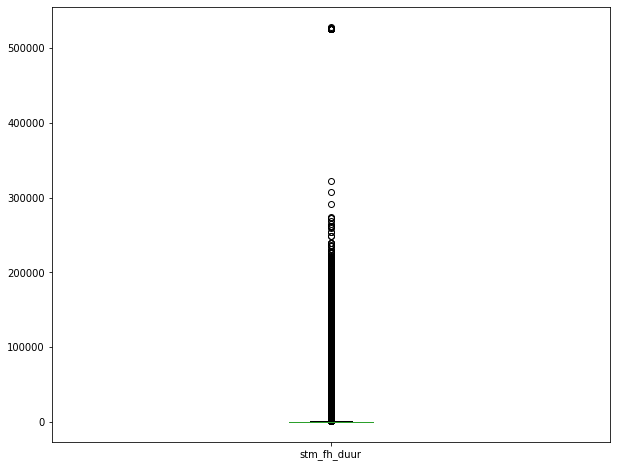

In [8]:
#Boxplot tekenen van de target variabel
data.plot.box(figsize=(10, 8))

In [9]:
data = data.sort_values() # sorteer de data

# bereken de Q1, Q3 en de IQR 
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
print("Q1 = {}, Q3 = {}".format(q1, q3)) 
print("IQR = Q3 - Q1 = {} - {} = {}".format(q1,q3,iqr))

# Bereken het aantal zwakke en sterke outliers boven en onder de boxplot.
zwakke_lower = data[(data<=q1-1.5*iqr)&(data>q1-3*iqr)].count()
sterke_lower = data[data<q1-3*iqr].count()
zwakke_upper = data[(data>=q3+1.5*iqr)&(data<q3+3*iqr)].count()
sterke_upper = data[data>q3+3*iqr].count()

print("Lengte van de data : {}".format(len(data)))
print()
print("Aantal sterke outliers boven de boxplot, boven de {} : {}".format(q3+3*iqr, sterke_upper))
print("Aantal zwakke outliers boven de boxplot, tussen {} en {} : {}".format(q3+1.5*iqr,q3+3*iqr, zwakke_upper))
print("Aantal sterke outliers onder de boxplot : {}, tussen de {} en {}".format(q1-1.5*iqr, q1-3*iqr, zwakke_lower))
print("Aantal sterke outliers onder de boxplot : {}, onder de ".format(q1-3*iqr, sterke_lower))

Q1 = 54.0, Q3 = 378.0
IQR = Q3 - Q1 = 54.0 - 378.0 = 324.0
Lengte van de data : 726775

Aantal sterke outliers boven de boxplot, boven de 1350.0 : 73187
Aantal zwakke outliers boven de boxplot, tussen 864.0 en 1350.0 : 43914
Aantal sterke outliers onder de boxplot : -432.0, tussen de -918.0 en 0
Aantal sterke outliers onder de boxplot : -918.0, onder de 


Aan de hand van de boxplot en de bovenstaande berekening, komen er veel outliers voor boven de boxplot. Er is te zien dat de outliers een invloed hebben op de gemiddelde ten opzichte van de mediaan. Deze outlier kan een negatieve invloed hebben op de accuracy van onze voorspellingen.

## Baseline model ontwikkelen

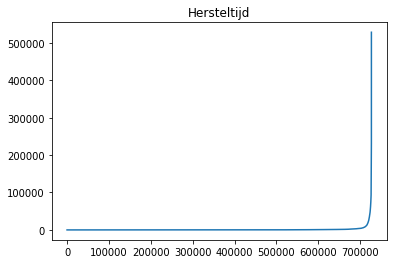

In [10]:
# Onze target variabel plotten in een 
x = range(0,len(data))
plt.plot(x,data)

plt.title('Hersteltijd')
plt.show()

In [11]:
len(data[data < data.mean()])

638074

In [12]:
len(data[data < data.mean()])/len(data)*100

87.79525988098105

In [13]:
print(len(data[data < data.median()]))
print(len(data[data > data.median()]))

363249
361597


Voor 88% van alle hersteltijd, duren korter dan 1141 minuten (+- 19 uur) <br>
Voor 50% van alle hersteltijd, duren korter/langer dan 120 minuten(2 uren)<br>

We gaan twee baseline model bouwen waar onze voorspelde reparatietijd is altijd gelijk aan de gemiddeld en de mediaan

In [14]:
data = data.to_frame() # zet om  Series naar dataframe
# Voeg twee 
data['Median']=  data['stm_fh_duur'].median()
data['Mean'] = data['stm_fh_duur'].mean()

In [15]:
data.head()

,stm_fh_duur,Median,Mean
716924,1.0,120.0,1141.258427
140064,1.0,120.0,1141.258427
536888,1.0,120.0,1141.258427
461109,1.0,120.0,1141.258427
268409,1.0,120.0,1141.258427


In [16]:
# De kwaliteit/score van de model bepalen mbh van RMSE
np.sqrt(mean_squared_error(data.loc[:,'stm_fh_duur'],data.loc[:,'Median']))

7176.591598082251

In [17]:
# De kwaliteit/score van de model bepalen mbh van RMSE
np.sqrt(mean_squared_error(data.loc[:,'stm_fh_duur'],data.loc[:,'Mean']))

7103.555320523756

### Conclusie voor de baseline model 

Er is voor onze baseline model  gekozen om  de mediaan als   voorspelde  waarde te gebruiken, omdat de mediaan is niet gevoelig voor outliers.

In [18]:
print(str(df['stm_oorz_groep'].loc[df['stm_fh_duur'] == df['stm_fh_duur'].max()]))

670693    ONR-DERD
Name: stm_oorz_groep, dtype: object


In [19]:
df.columns

Index(['Unnamed: 0', '#stm_sap_meldnr', 'stm_mon_nr', 'stm_vl_post',
       'stm_sap_meld_ddt', 'stm_sap_meldtekst_lang', 'stm_sap_meldtekst',
       'stm_geo_mld', 'stm_geo_mld_uit_functiepl', 'stm_equipm_nr_mld',
       'stm_equipm_soort_mld', 'stm_equipm_omschr_mld', 'stm_km_van_mld',
       'stm_km_tot_mld', 'stm_prioriteit', 'stm_status_melding_sap',
       'stm_aanngeb_ddt', 'stm_oh_pg_gst', 'stm_geo_gst',
       'stm_geo_gst_uit_functiepl', 'stm_equipm_nr_gst',
       'stm_equipm_soort_gst', 'stm_equipm_omschr_gst', 'stm_km_van_gst',
       'stm_km_tot_gst', 'stm_oorz_groep', 'stm_oorz_code', 'stm_oorz_tkst',
       'stm_fh_ddt', 'stm_fh_status', 'stm_sap_storeind_ddt',
       'stm_tao_indicator', 'stm_tao_indicator_vorige',
       'stm_tao_soort_mutatie', 'stm_tao_telling_mutatie',
       'stm_tao_beinvloedbaar_indicator', 'stm_evb', 'stm_sap_melddatum',
       'stm_sap_meldtijd', 'stm_contractgeb_mld', 'stm_functiepl_mld',
       'stm_techn_mld', 'stm_contractgeb_gst', 'stm_fu

In [20]:
# Hierboven gaan we kijken naar de daadwerkelijk probleem van de maximale hersteltijd.